In [11]:
import pdfplumber
import pandas as pd
import os

In [12]:
import logging
logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

## Pdfplumber

In [19]:
table_Settings={
    'vertical_strategy':'text',
    'join_x_tolerance':,
    
}

SyntaxError: expression expected after dictionary key and ':' (589986767.py, line 3)

In [ ]:
from collections import defaultdict
final_table=defaultdict(list)
with pdfplumber.open('adani_q1fy26_results.pdf') as pdf:
    for i,page in enumerate(pdf.pages):
        # print("page: ",i+1)
        tables=page.extract_tables()
        
        # print(tables)
        if len(tables)>0:
        #     print(tables)
            for table in tables:
                columns=[]
                empty_col=1
                for column in table[0]:
                    if column!=None and len(column)>0:
                        columns.append(column)
                    else:
                        columns.append(f'empty_col_{empty_col}')
                        empty_col+=1
                # print(columns)
                if len(columns)>0:
                    final_table[i+1].append(pd.DataFrame(columns=columns,data=table[1:]))
        # print(final_table)
        # print(tables)

In [ ]:
pdf=pdfplumber.open('adani_q1fy26_results.pdf')

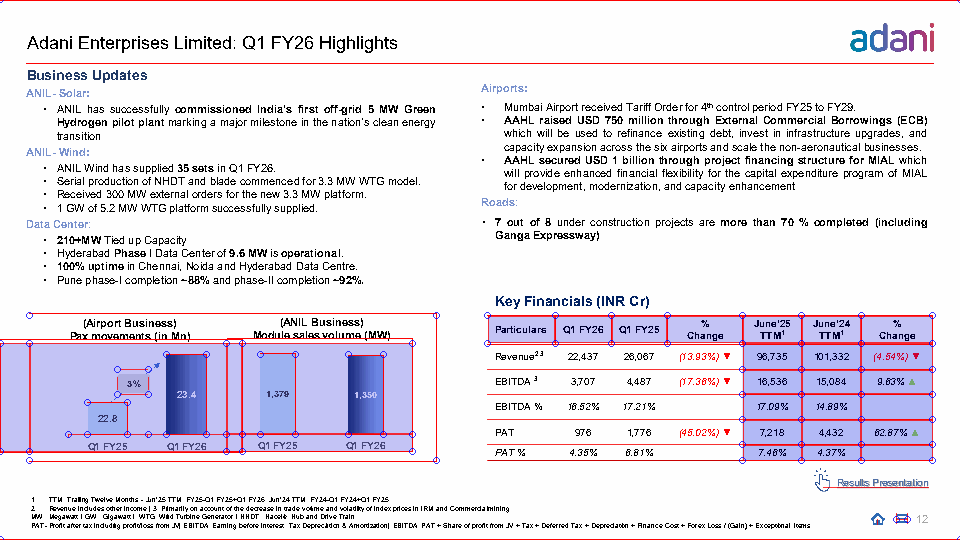

In [ ]:
page=pdf.pages[11].to_image()
table_Settings={
    "vertical_strategy": "lines",
        "horizontal_strategy": "lines",
        "snap_tolerance": 6,
        "join_tolerance": 15,
        "intersection_tolerance": 8,
        # "edge_min_length": 4,
        "text_tolerance": 1,


    
}
page.reset().debug_tablefinder(table_Settings)

In [ ]:
pdf.pages[11].extract_tables(resolution=700)[1]

TypeError: Page.extract_tables() got an unexpected keyword argument 'resolution'

In [ ]:
len(final_table)

29

In [ ]:
final_table.keys()

dict_keys([2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41])

In [ ]:
final_table[5][0]

,Utility,empty_col_1,empty_col_2,empty_col_3,empty_col_4,empty_col_5,11,",895",empty_col_6,"11,638",2.21%,▲,empty_col_7,"43,633","41,722",4.58%,▲,48.17%
0,Transport,,,,,,5,",949",,"5,265",12.99%,▲,None,"21,154","18,405",14.94%,▲,23.36%
1,AEL - Infrastr,uc,tu,re Busin,esses,,2,",825",,"2,691",4.98%,▲,None,"10,219","7,318",39.64%,▲,11.28%
2,A. Sub-total (,Inf,ra,structure,),,20,",669",,"19,594",5.49%,▲,None,"75,006","67,445",11.21%,▲,82.81%
3,B. Adjacencie,s,(C,ement),,,2,",242",,"1,638",36.87%,▲,None,"9,249","7,291",26.86%,▲,10.22%
4,Sub-total (In,fra,+,Adjacenc,ies),,22,",911",,"21,232",7.91%,▲,None,"84,255","74,736",12.74%,▲,93.03%
5,C. AEL- Exist,in,g B,usiness,es,,,882,,"1,796",(50.89%)2,▼,None,"6,317","7,766",(18.66%)2,▼,6.97%
6,Portfolio EBI,TD,A (,A+B+C),,,23,",793",,"23,028",3.32%,▲,None,"90,572","82,502",9.78%,▲,100%
7,,,,,ve,,,,,422,,,None,"2,417","3,247",,,
8,APL prior per\n(provision) in,io\nclu,d i\nde,ncome/\nd in abo,None,,,406,,None,None,None,None,None,None,None,None,None
9,,,,,None,,,,,None,None,None,None,None,None,None,None,None


In [ ]:
valid_tables=defaultdict(list)
for page,tables in final_table.items():
    for table in tables:
        is_valid=False
        if len(table)<2:
            continue
        else:
            is_valid=True
        for column in table.columns:
            if "empty_col" in column:
                is_valid=False
                continue
            else:
                is_valid=True
        
        if is_valid:
            valid_tables[page].append(table)

        

In [ ]:
len(valid_tables)

17

In [ ]:
valid_tables.keys()

dict_keys([5, 7, 8, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

In [ ]:
valid_tables[16][2]

,"2,140"
0,"1,401"
1,"7,393"


## Tabula

In [ ]:
import tabula
tabula_tables=tabula.read_pdf("adani_q1fy26_results.pdf", pages='all',encoding="cp1252")

In [ ]:
len(tabula_tables)

65

In [ ]:
tabula_tables[25]

,"FY25FY24\rEBITDA (INR Cr)\r7,7476,323\rEBITDA (USD bn)\r0.910.76\rCAT (FFO) (INR Cr)\r5,1793,824\rCAT (FFO) (USD bn)\r0.610.46\r1 Year EBITDA6 Year EBITDA\rGrowth RateCAGR\r22.53%16.40%",Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,FY25,FY24,NaN
1,EBITDA (INR Cr),"7,747","6,323",NaN
2,EBITDA (USD bn),0.91,0.76,NaN
3,CAT (FFO) (INR Cr),"5,179","3,824",NaN
4,CAT (FFO) (USD bn),0.61,0.46,NaN
5,NaN,NaN,NaN,NaN
6,NaN,1 Year EBITDA\rGrowth Rate,NaN,6 Year EBITDA\rCAGR
7,22.53%,16.40%,NaN,NaN


## Camelot

In [ ]:
import camelot

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [ ]:
tables = camelot.read_pdf('adani_q1fy26_results.pdf',pages='all',flavor='stream')

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table 

In [ ]:
len(tables)

54

In [ ]:
tables[13].df

,0,1,2,3,4,5,6,7,8,9,10
0,"100% uptime in Chennai, Noida and Hyderabad Da...",,,,,,,,,,
1,Pune phase-I completion ~88% and phase-II comp...,,,,,,,,,,
2,,,,,,Key Financials (INR Cr),,,,,
3,(Airport Business),,(ANIL Business),,,,,%,June’25,June’24,%
4,,,,,Particulars,Q1 FY26,Q1 FY25,,,,
5,Pax movements (in Mn),,Module sales volume (MW),,,,,Change,TTM1,TTM1,Change
6,(Airport Business),,(ANIL Business),,,,,,,,
7,,,Module sales volume (MW),,Revenue2.3,"22,437","26,067",(13.93%) ▼,"96,735","101,332",(4.54%) ▼
8,Pax movements (in Mn),,,,,,,,,,
9,3%,,,,EBITDA 3,"3,707","4,487",(17.36%) ▼,"16,536","15,084",9.63% ▲


## Table Transformer (TaTr)

In [13]:
from transformers import AutoImageProcessor, TableTransformerForObjectDetection

In [14]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\torch\nn\modules\module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\torch\nn\modules\module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the che

In [ ]:
page=pdf.pages[4].to_image().original

In [ ]:
# import numpy as np
# np.array(page)

In [ ]:
inputs = image_processor(images=page, return_tensors="pt")
outputs = model(**inputs)

In [ ]:
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

In [ ]:
results

{'scores': tensor([0.9963], grad_fn=<IndexBackward0>),
 'labels': tensor([0]),
 'boxes': tensor([[424.9650, 231.9071, 802.0612, 459.5547]], grad_fn=<IndexBackward0>)}

In [ ]:
model.config.id2label

{0: 'table', 1: 'table rotated'}

In [ ]:
# outputs
import torch
target_sizes = torch.tensor([page.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected table with confidence 0.999 at location [35.79, 64.1, 933.17, 333.79]


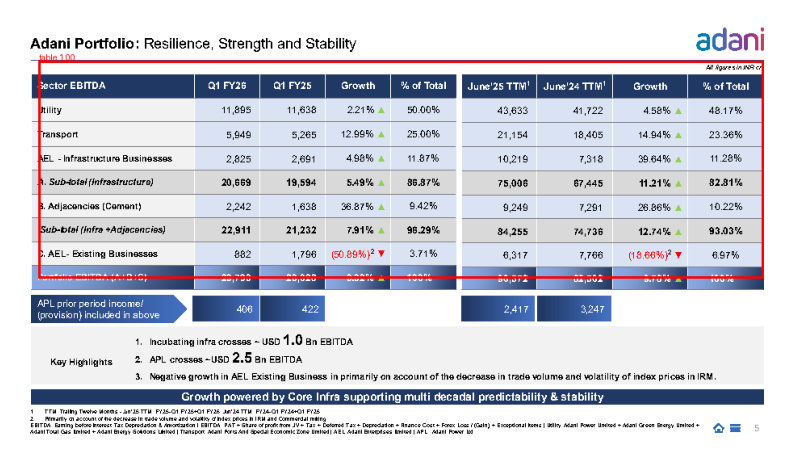

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
draw = ImageDraw.Draw(page)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]-10), f"{model.config.id2label[label.item()]} {score:.2f}", fill="red")

# 6️⃣ Show the image
plt.figure(figsize=(10, 10))
plt.imshow(page)
plt.axis("off")
plt.show()

In [ ]:
pdf.pages[11].height

540

In [ ]:
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()

    # ⚠️ Important: pdfplumber uses PDF coordinate system (origin = bottom-left)
    # PIL images use origin at top-left → we must flip Y coordinates
    page_height = float(pdf.pages[1].height)
    bbox_pdf = (x0-10,   y0-10, x1+10,  y1+10)

    # Crop region
    cropped_page = pdf.pages[1].within_bbox(bbox_pdf)

    # Extract the table using pdfplumber
    table = cropped_page.extract_table()

    print(f"\n--- Table {i+1} ---")
    if table:
        for row in table:
            print(row)
    else:
        print("No structured table detected, maybe text-only region.")


--- Table 1 ---
No structured table detected, maybe text-only region.


In [ ]:
import camelot
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()
    # for i, area in enumerate():
    print(f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}")
    tables = camelot.read_pdf("adani_q1fy26_results.pdf", pages="2",flavor='stream',row_tol=8,table_areas=[f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}"])
    # print(f"\n--- Table {i+1} ---")
    if len(tables) > 0:
        print(tables[0].df)

414.9649658203125,298.09288024902344,812.0611572265625,90.44534301757812
     0                                              1
0   02     Adani Portfolio: Business Wise Performance
1  02a                      Adani Enterprises Limited
2  02b                     Adani Green Energy Limited
3  02c                 Adani Energy Solutions Limited
4  02d                            Adani Power Limited
5  02e                        Adani Total Gas Limited
6  02f  Adani Ports and Special Economic Zone Limited
7  02g                                 Ambuja Cements


In [ ]:
tables[0].df

,0,1
0,Entity,Rating
1,AGEL RG2,BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)


In [ ]:
import tabula
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()
    dfs = tabula.read_pdf(
        "adani_q1fy26_results.pdf",
        pages=17,
        area=[y0-10,x0-10,y1+10,x1+10],       # 👈 coordinates in points
        # multiple_tables=False,
        # lattice=True     # or stream=True depending on the table type,
        encoding="cp1252",
        stream=True
    )
    print(dfs[0])

                Entity          Rating Agency         Rating
0  AGEL (Consolidated)          India Ratings    AA-/ Stable
1             AGEL RG1  CRISIL/ India Ratings  AA+/ Positive
2                  NaN        CAREEDGE/ ICRA/            NaN
3       AGEL Hybrid RG                    NaN    AA+/ Stable
4                  NaN          India Ratings            NaN
                              International Ratings
0                                     Entity Rating
1  AGEL RG2 BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)
2              AGEL RG1 BBB- (Fitch)/ Ba1 (Moody’s)


In [ ]:
dfs[0]

,International Ratings
0,Entity Rating
1,AGEL RG2 BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)
2,AGEL RG1 BBB- (Fitch)/ Ba1 (Moody’s)


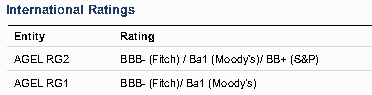

In [ ]:
cropped_page.to_image()

## Extract Tables

In [15]:
import torch
from PIL import ImageDraw
import matplotlib.pyplot as plt
import camelot
import tabula

In [16]:
# pdf_path="adani_q1fy26_results.pdf"
pdf_path="nestle_report.pdf"
pdf=pdfplumber.open(pdf_path)

In [2]:
# pdf

In [17]:
from collections import defaultdict
pdfplumber_tables=defaultdict(list)
camelot_tables=defaultdict(list)
tabula_tables=defaultdict(list)
adjustment_factor=5
extracted_texts=defaultdict(str)

for j,page in enumerate(pdf.pages):
    # print(j+1)
    page_number=page.page_number
    # print(page_number)
    page_height = float(page.height)
    page_width=float(page.width)
    page_img=page.to_image().original
    inputs = image_processor(images=page_img, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([page_img.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

    no_table_page=page
    # draw = ImageDraw.Draw(page_img)

    # for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    #     box = [round(i, 2) for i in box.tolist()]
    #     draw.rectangle(box, outline="red", width=3)
    #     draw.text((box[0], box[1]-10), f"{model.config.id2label[label.item()]} {score:.2f}", fill="red")

    # # 6️⃣ Show the image
    # plt.figure(figsize=(10, 10))
    # plt.imshow(page_img)
    # plt.axis("off")
    # plt.show()

    #iterating over all the tables detected
    for i, box in enumerate(results["boxes"]):
        # print(box)
        x0, y0, x1, y1 = box.tolist()

        #pdfplumber
        bbox_pdf = (max(0,x0-adjustment_factor),   max(0,y0-adjustment_factor), min(page_width,x1+adjustment_factor),  min(page_height,y1+adjustment_factor))

        # Crop region
        cropped_page = page.within_bbox(bbox_pdf)
        no_table_page=no_table_page.outside_bbox(bbox_pdf)


        # Extract the table using pdfplumber
        table = cropped_page.extract_table()
        # print(table)
        columns=[]
        empty_col=1
        if table:
            for column in table[0]:
                if column!=None and len(column)>0:
                    columns.append(column)
                else:
                    columns.append(f'{empty_col}')
                    empty_col+=1
            # print(columns)
            if len(columns)>0:
                # print(pd.DataFrame(columns=columns,data=table[1:]))
                pdfplumber_tables[page_number].append(pd.DataFrame(columns=columns,data=table[1:]))
        print("pdfplumber done")

        #camelot
        # print(f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}")
        # print(f"{max(0,x0-adjustment_factor)},{page_height-y0-adjustment_factor},{min(page_width,x1+adjustment_factor)},{page_height-y1+adjustment_factor}")
        try:
            camelot_table = camelot.read_pdf(pdf_path, pages=f"{page_number}",flavor='stream',row_tol=8,table_areas=[f"{max(0,x0-adjustment_factor)},{page_height-y0-adjustment_factor},{min(page_width,x1+adjustment_factor)},{page_height-y1+adjustment_factor}"])
            if len(camelot_table) > 0:
                camelot_tables[page_number].append(camelot_table[0].df)
        except:
            print("camelot error")
        
        print("camelot done")

        #tabula
        tabula_table = tabula.read_pdf(
            pdf_path,
            pages=page_number,
            area=[max(0,y0-adjustment_factor),max(0,x0-adjustment_factor),min(page_height,y1+adjustment_factor),min(page_width,x1+adjustment_factor)],       #coordinates in points
            encoding="cp1252",
            stream=True
        )
        tabula_tables[page_number].extend(tabula_table)
        print("tabula done")

    bbox_footer = (0,   no_table_page.height*0.90 , no_table_page.width ,  no_table_page.height)
    no_table_page=no_table_page.outside_bbox(bbox_footer)
    extracted_text=no_table_page.extract_text()

    # print(extracted_text)  
    extracted_texts[page_number]=extracted_text


pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (51.80728530883789, 6.762699707031288, 556.694091796875, 518.1549421386719)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (26.417396545410156, 489.0255933837891, 395.3881530761719, 615.2408414916993)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (28.532642364501953, 82.87060986328129, 400.0213928222656, 642.861988647461)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (46.75371170043945, 531.2780805664063, 411.60504150390625, 631.9694639282227)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (29.22030258178711, 65.25299511718754, 407.39788818359375, 616.1415144042969)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (29.310943603515625, 69.94470654296879, 402.4573669433594, 477.9810834960938)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (47.86960220336914, 507.8007703857422, 420.48687744140625, 635.2310072021485)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (26.36631202697754, 242.8869978027344, 394.47979736328125, 473.6198774414063)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (48.296287536621094, 84.51672802734379, 422.23858642578125, 619.2249952392579)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (27.621990203857422, 229.4467817382813, 401.012451171875, 626.7594343261719)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (48.06768798828125, 60.95013867187504, 421.7403869628906, 615.8443494873047)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tab

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (115.78395080566406, 132.37006054687504, 478.0705871582031, 596.9386945800782)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (181.50218200683594, 85.50922070312504, 459.2088623046875, 590.4462476806641)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot error
camelot done
tabula done


In [ ]:
len(pdfplumber_tables),len(camelot_tables),len(tabula_tables)

(17, 23, 23)

In [ ]:
pdfplumber_tables.keys()

dict_keys([5, 8, 12, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 34, 36, 38, 41])

In [ ]:
pdfplumber_tables[5][0].columns.tolist()

['Sector EBITDA', 'Q1 FY26', 'Q1 FY25', 'Growth', '% of Total']

In [ ]:
pdfplumber_tables[5][0]

,Q1 FY26,Q1 FY25,Growth,% of Total
0,"11,895","11,638",2.21% ▲,50.00%
1,"5,949","5,265",12.99% ▲,25.00%
2,"2,825","2,691",4.98% ▲,11.87%
3,"20,669","19,594",5.49% ▲,86.87%
4,"2,242","1,638",36.87% ▲,9.42%
5,"22,911","21,232",7.91% ▲,96.29%
6,882,"1,796",(50.89%)2 ▼,3.71%


In [ ]:
camelot_tables.keys()

dict_keys([2, 5, 8, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 33, 34, 36, 38, 41])

In [ ]:
camelot_tables[5][0]

,0,1,2,3,4,5,6,7,8
0,,,,,,,,,All figures in INR cr
1,Sector EBITDA,Q1 FY26,Q1 FY25,Growth,% of Total,June’25 TTM1,June’24 TTM1,Growth,% of Total
2,Utility,"11,895","11,638",2.21% ▲,50.00%,"43,633","41,722",4.58% ▲,48.17%
3,Transport,"5,949","5,265",12.99% ▲,25.00%,"21,154","18,405",14.94% ▲,23.36%
4,AEL - Infrastructure Businesses,"2,825","2,691",4.98% ▲,11.87%,"10,219","7,318",39.64% ▲,11.28%
5,A. Sub-total (Infrastructure),"20,669","19,594",5.49% ▲,86.87%,"75,006","67,445",11.21% ▲,82.81%
6,B. Adjacencies (Cement),"2,242","1,638",36.87% ▲,9.42%,"9,249","7,291",26.86% ▲,10.22%
7,Sub-total (Infra +Adjacencies),"22,911","21,232",7.91% ▲,96.29%,"84,255","74,736",12.74% ▲,93.03%
8,C. AEL- Existing Businesses,882,"1,796",(50.89%)2 ▼,3.71%,"6,317","7,766",(18.66%)2 ▼,6.97%


In [ ]:
camelot_tables[5][0].columns.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
tabula_tables.keys()

dict_keys([2, 5, 8, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 33, 34, 36, 38, 41])

In [ ]:
tabula_tables[5][0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,All figures in INR cr
0,Sector EBITDA,Q1 FY26,Q1 FY25,Growth,% of Total,June’25 TTM1,June’24 TTM1,Growth,% of Total
1,Utility,"11,895","11,638",2.21% ?,50.00%,"43,633","41,722",4.58% ?,48.17%
2,Transport,"5,949","5,265",12.99% ?,25.00%,"21,154","18,405",14.94% ?,23.36%
3,AEL - Infrastructure Businesses,"2,825","2,691",4.98% ?,11.87%,"10,219","7,318",39.64% ?,11.28%
4,A. Sub-total (Infrastructure),"20,669","19,594",5.49% ?,86.87%,"75,006","67,445",11.21% ?,82.81%
5,B. Adjacencies (Cement),"2,242","1,638",36.87% ?,9.42%,"9,249","7,291",26.86% ?,10.22%
6,Sub-total (Infra +Adjacencies),"22,911","21,232",7.91% ?,96.29%,"84,255","74,736",12.74% ?,93.03%
7,C. AEL- Existing Businesses,882,"1,796",(50.89%)2 ?,3.71%,"6,317","7,766",(18.66%)2 ?,6.97%
8,Portfolio EBITDA (A+B+C),"23,793","23,028",3.32% ?,100%,"90,572","82,502",9.78% ?,100%


In [ ]:
tabula_tables[5][0].columns.to_list()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'All figures in INR cr']

## Preprocessing

1. max column names (no numbers)
2. least number of empty cells
3. combination of columns and most cell data

In [ ]:
# def number_of_correct_cols(source,table):
#     if source=="camelot":
#         cols=table.columns.tolist()
#         nums=0
#         for col in cols:
#             if type(col)==str and "Unnamed" not in col:
#                 nums+=1
#         if nums==0:
#             cols=list(table.iloc[0].values) #1st row sometimes has the column names in camelot
#             for col in cols:
#                 if type(col)==str and "Unnamed" not in col:
#                     nums+=1
#         if nums>0:
#             return nums, cols
        
#     else:
#         cols=table.columns.tolist()
#         nums=0
#         for col in cols:
#             if type(col)==str and "Unnamed" not in col:
#                 nums+=1
    
#     return nums,None


In [ ]:
# def number_of_empty_cells(table):
#     values=table.values.reshape(1,-1)[0]
#     return pd.isna(values).sum()

In [18]:
def number_of_valid_cells(table):
    values=table.values.reshape(1,-1)[0]

    return table.shape[0]*table.shape[1]-pd.isna(values).sum() #total cells-invalid cells

In [ ]:
pattern = re.compile(r'^(?![\d,.\s]+$).+')
bool(pattern.match("0,"))

False

In [19]:
import re
def process_columns(table,plumber_table):
    cols=table.columns.tolist()
    # check if columns from plumber are present or not, if plumber did not generate any table then pick the first row 
    is_valid=False
    tries=-1
    pattern = re.compile(r'^(?![\d,.\s]+$).+')
    plumber_cols=plumber_table.columns.tolist()

    is_plumber_valid=False
    for plumber_col in plumber_cols:
        if bool(pattern.match(plumber_col)):
            is_plumber_valid=True
            break
    
    # print(is_plumber_valid)

    if not plumber_table.empty and is_plumber_valid:
        for plumber_col in plumber_table.columns.tolist():
            if tries<=3 and plumber_col in cols:
                is_valid=True
                break
            else:
                if tries+1<len(table):
                    cols=list(table.iloc[tries+1].values)
                    tries+=1
        
        if is_valid:
            if tries>=0:
                table.columns=list(table.iloc[tries].values)
                table.drop(index=tries,inplace=True)

        else:
            nums=0
            for col in cols:
                if type(col)==str and "Unnamed" not in col:
                    nums+=1
            # print(nums)
            if nums==0:
                table.columns=list(table.iloc[0].values)
                table.drop(index=0,inplace=True)
    else:
        table.columns=list(table.iloc[0].values)
        table.drop(index=0,inplace=True)
    
    return table

In [ ]:
# list(pdfplumber_tables.keys())+list(tabula_tables.keys())+list(camelot_tables.keys())

In [ ]:
camelot_tables[52][0]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,EUR,NA,AOA,LATAM,GC,Total,EUR,NA,AOA,LATAM,GC,Total
1,As at December 31,13.1,9.3,9.3,9.3,5.8,12.1,13.2,9.9,9.5,10.1,5.8,12.3


In [20]:
#finding the method with the highest number of valid cells
#checking highest number of valid columns
#priority order: tabula->camelot->pdfplumber
import numpy as np

all_pages=list(set(list(pdfplumber_tables.keys())+list(tabula_tables.keys())+list(camelot_tables.keys())))
all_pages.sort()

final_tables=defaultdict(list)
for page in all_pages:
    # print(page)
    pdfplumber_pages=pdfplumber_tables.get(page,[])
    camelot_pages=camelot_tables.get(page,[])
    tabula_pages=tabula_tables.get(page,[])

    max_tables=max(len(pdfplumber_pages),len(camelot_pages),len(tabula_pages))

    for i in range(max_tables):
        try:
            pdfplumber_page=pdfplumber_pages[i]
        except:
            pdfplumber_page=pd.DataFrame()
        
        try:
            camelot_page=camelot_pages[i]
        except:
            camelot_page=pd.DataFrame()
        
        try:
            tabula_page=tabula_pages[i]
        except:
            tabula_page=pd.DataFrame()


        plumber_valids,camelot_valids,tabula_valids=0,0,0
        final_table=pd.DataFrame()

        # print("plumber",pdfplumber_page,"\n","camelot",camelot_page,"\n","tabula",tabula_page)

        if not pdfplumber_page.empty:
            plumber_valids=number_of_valid_cells(pdfplumber_page)
            
        
        if not camelot_page.empty:
            camelot_valids=number_of_valid_cells(camelot_page)
            

        if not tabula_page.empty:
            tabula_valids=number_of_valid_cells(tabula_page)
        

        ## Process columns 
        if tabula_valids>camelot_valids:
            if tabula_valids>plumber_valids:
                #process columns for tabula
                final_table=process_columns(tabula_page.copy(),pdfplumber_page.copy())
                
            elif tabula_valids<plumber_valids:
                #process columns for plumber
                final_table=process_columns(pdfplumber_page.copy(),pdfplumber_page.copy())
                
            else:
                #equal case prefer tabula
                final_table=process_columns(tabula_page.copy(),pdfplumber_page.copy())

        elif tabula_valids<camelot_valids:
            if camelot_valids>plumber_valids:
                #process columns for camelot
                # print(camelot_page)
                final_table=process_columns(camelot_page.copy(),pdfplumber_page.copy())
                
            elif camelot_valids<plumber_valids:
                #process columns for plumber
                final_table=process_columns(pdfplumber_page.copy(),pdfplumber_page.copy())
        
            else:
                #equal case prefer camelot
                final_table=process_columns(camelot_page.copy(),pdfplumber_page.copy())
            
        else:
            #equal case
            if tabula_valids<plumber_valids:
                #process columns for plumber
                final_table=process_columns(pdfplumber_page.copy(),pdfplumber_page.copy())
            
            else:
                #process columns for tabula
                final_table=process_columns(tabula_page.copy(),pdfplumber_page.copy())
                
        final_tables[page].append(final_table)
    
    


In [ ]:
len(final_tables)

104

In [ ]:
final_tables[7]

[]

In [ ]:
# #method having least number of empty cells will be chosen with column names extracted from method having most number of column names corrct
# #priority order: tabula->pdfplumber->camelot

# import numpy as np

# all_pages=list(set(list(pdfplumber_tables.keys())+list(tabula_tables.keys())+list(camelot_tables.keys())))
# all_pages.sort()

# final_tables=[]
# for page in all_pages:
#     pdfplumber_page=pdfplumber_tables.get(page,None)
#     camelot_page=camelot_tables.get(page,None)
#     tabula_page=tabula_page.get(page,None)

#     plumber_nums,camelot_nums,tabula_nums=0,0,0
#     plumber_nulls,camelot_nulls,tabula_nulls=np.inf,np.inf,np.inf
#     candidates=[]

#     if pdfplumber_page:
#         plumber_nums,_=number_of_correct_cols("plumber",pdfplumber_page)
#         plumber_nulls=number_of_empty_cells(pdfplumber_page)
#         candidates.append({
#             "method": "plumber",
#             "nums": plumber_nums,
#             "nulls": plumber_nulls
#         })
    
#     if camelot_page:
#         camelot_nums,camelot_cols=number_of_correct_cols("camelot",camelot_page)
#         camelot_nulls=number_of_empty_cells(camelot_page)
#         candidates.append({
#             "method": "camelot",
#             "nums": camelot_nums,
#             "nulls": camelot_nulls
#         })

#     if tabula_page:
#         tabula_nums,_=number_of_correct_cols("tabula",tabula_page)
#         tabula_nulls=number_of_empty_cells(tabula_page)
#         candidates.append({
#             "method": "camelot",
#             "nums": camelot_nums,
#             "nulls": camelot_nulls
#         })
    
#     priority = {"tabula": 3, "plumber": 2, "camelot": 1}

#     best_table = sorted(
#         candidates,
#         key=lambda x: (x["nulls"], -priority[x["method"]])
#     )[0]
    
#     # 2️⃣ Find the table with the *most* correct columns
#     best_columns_source = sorted(
#         candidates,
#         key=lambda x: (-x["nums"], -priority[x["method"]])
#     )[0]


#     if best_columns_source['method']=='plumber':
#         final_columns=pdfplumber_page.columns.tolist()

#     elif best_columns_source['method']=='tabula':
#         final_columns=tabula_page.columns.tolist()

#     elif best_columns_source['method']=='camelot':
#         final_columns=camelot_cols
    

    


In [ ]:
pdfplumber_tables[12][0].values.reshape(1,-1)[0]

array([None, None, None, None, '96,735', '101,332', None, None, None,
       None, '16,536', '15,084', None, None, None, None, '17.09%',
       '14.89%', None, None, None, None, '7,218', '4,432', None, None,
       None, None, '7.46%', '4.37%'], dtype=object)

In [ ]:
import numpy as np
pd.isna(pdfplumber_tables[12][0].values.reshape(1,-1)[0]).sum()

np.int64(20)

In [ ]:
camelot_tables[5][0].iloc[0].values

array(['', '', '', '', '', '', '', '', 'All figures in INR cr'],
      dtype=object)

In [ ]:
temp=tabula_tables[5][0]

In [ ]:
temp.columns=list(temp.iloc[0].values)
temp.drop(index=0,inplace=True)

In [ ]:
temp

,Sector EBITDA,Q1 FY26,Q1 FY25,Growth,% of Total,June’25 TTM1,June’24 TTM1,Growth,% of Total
1,Utility,"11,895","11,638",2.21% ?,50.00%,"43,633","41,722",4.58% ?,48.17%
2,Transport,"5,949","5,265",12.99% ?,25.00%,"21,154","18,405",14.94% ?,23.36%
3,AEL - Infrastructure Businesses,"2,825","2,691",4.98% ?,11.87%,"10,219","7,318",39.64% ?,11.28%
4,A. Sub-total (Infrastructure),"20,669","19,594",5.49% ?,86.87%,"75,006","67,445",11.21% ?,82.81%
5,B. Adjacencies (Cement),"2,242","1,638",36.87% ?,9.42%,"9,249","7,291",26.86% ?,10.22%
6,Sub-total (Infra +Adjacencies),"22,911","21,232",7.91% ?,96.29%,"84,255","74,736",12.74% ?,93.03%
7,C. AEL- Existing Businesses,882,"1,796",(50.89%)2 ?,3.71%,"6,317","7,766",(18.66%)2 ?,6.97%
8,Portfolio EBITDA (A+B+C),"23,793","23,028",3.32% ?,100%,"90,572","82,502",9.78% ?,100%


In [ ]:
number_of_correct_cols(pdfplumber_tables[5][0]),number_of_correct_cols(camelot_tables[5][0])

(5, 0)

## Chunking and VectorDB

1. using weaviate as vectordb to store text from pdf
2. chunking of document will be done on the basis of pages
3. add page number as metadata
4. while fetching vectors from vectordb use the metadata to fetch the table
5. convert the table to json or some format understable by llm

In [1]:
import weaviate
from langchain_weaviate import WeaviateVectorStore
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.document_loaders import PDFPlumberLoader,PyPDFium2Loader,pdf
# from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import OllamaEmbeddings
from weaviate.connect import ConnectionParams
from weaviate.classes.init import Auth
from weaviate.classes.init import AdditionalConfig, Timeout
from langchain_classic.schema import Document

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# pdf_reader=PyPDFLoader(pdf_path)
# pdf_reader=PyMuPDFLoader(pdf_path)
pdf_reader=PDFPlumberLoader(pdf_path)
# pdf_reader=PyPDFium2Loader(pdf_path)

In [ ]:
documents=pdf_reader.load()

In [ ]:
documents[0].page_content

'Financial\nStatements 2024\nConsolidated Financial Statements\nof the Nestlé Group 2024\n158th Financial Statements\nof Nestlé S.A.\n'

In [ ]:
len(documents)

134

In [ ]:
extracted_texts[1]

'Financial\nStatements 2024\nConsolidated Financial Statements\nof the Nestlé Group 2024\n158th Financial Statements\nof Nestlé S.A.'

In [21]:
documents=[]

In [22]:
for page_num,text in extracted_texts.items():
    documents.append(Document(metadata={'page':page_num},page_content=text))

In [ ]:
# for document in documents:
#     document.metadata['page']+=1

In [23]:
print(documents[3].page_content)

161 Companies of the Nestlé Group, joint
arrangements and associates
177 Report of the statutory auditor
188 Financial information – 5-year review


In [ ]:
final_tables[2][0].to_json()

'{"01":{"1":"02","2":"02a","3":"02b","4":"02c","5":"02d","6":"02e","7":"02f","8":"02g"},"Adani Portfolio Overview":{"1":"Adani Portfolio: Business Wise Performance","2":"Adani Enterprises Limited","3":"Adani Green Energy Limited","4":"Adani Energy Solutions Limited","5":"Adani Power Limited","6":"Adani Total Gas Limited","7":"Adani Ports and Special Economic Zone Limited","8":"Ambuja Cements"}}'

In [24]:
final_table_markdown=defaultdict(list)
for page_num,tables in final_tables.items():
    for table in tables:
        final_table_markdown[page_num].append(table.to_markdown())

In [25]:
print(final_table_markdown[5][0])

|    | 0                         | 1   | 2              | 3      |
|---:|:--------------------------|:----|:---------------|:-------|
|  0 |                           |     | Year-end rates |        |
|  1 | 1 US Dollar               | USD | 0.904          | 0.841  |
|  2 | 1 Euro                    | EUR | 0.941          | 0.931  |
|  3 | 100 Chinese Yuan Renminbi | CNY | 12.380         | 11.859 |
|  4 | 100 Brazilian Reais       | BRL | 14.594         | 17.381 |
|  5 | 100 Mexican Pesos         | MXN | 4.370          | 4.964  |
|  6 | 1 Pound Sterling          | GBP | 1.135          | 1.072  |
|  7 | 100 Philippine Pesos      | PHP | 1.563          | 1.519  |
|  8 | 1 Canadian Dollar         | CAD | 0.629          | 0.636  |
|  9 | 100 Indian Rupee          | INR | 1.055          | 1.012  |
| 10 | 1 Australian Dollar       | AUD | 0.562          | 0.575  |
| 11 | 100 Chilean Pesos         | CLP | 0.091          | 0.095  |


In [26]:
for document in documents:
    document.metadata['table_markdown']=final_table_markdown[document.metadata['page']]

In [27]:
documents[4]

Document(metadata={'page': 5, 'table_markdown': ['|    | 0                         | 1   | 2              | 3      |\n|---:|:--------------------------|:----|:---------------|:-------|\n|  0 |                           |     | Year-end rates |        |\n|  1 | 1 US Dollar               | USD | 0.904          | 0.841  |\n|  2 | 1 Euro                    | EUR | 0.941          | 0.931  |\n|  3 | 100 Chinese Yuan Renminbi | CNY | 12.380         | 11.859 |\n|  4 | 100 Brazilian Reais       | BRL | 14.594         | 17.381 |\n|  5 | 100 Mexican Pesos         | MXN | 4.370          | 4.964  |\n|  6 | 1 Pound Sterling          | GBP | 1.135          | 1.072  |\n|  7 | 100 Philippine Pesos      | PHP | 1.563          | 1.519  |\n|  8 | 1 Canadian Dollar         | CAD | 0.629          | 0.636  |\n|  9 | 100 Indian Rupee          | INR | 1.055          | 1.012  |\n| 10 | 1 Australian Dollar       | AUD | 0.562          | 0.575  |\n| 11 | 100 Chilean Pesos         | CLP | 0.091          | 0.095  |

In [ ]:
list(table.T.iloc[0])

['Company',
 'ACL',
 'ACC',
 'APSEZ',
 '',
 '-\nAICTPL',
 'AESL',
 '- AESL USPP',
 '-\nAEML',
 '',
 '- ATSOL – OG',
 '',
 'ATGL',
 'AGEL',
 '- AGEL RG2',
 '',
 '- AGEL RG1',
 'AEL',
 '- AAHL',
 '- MIAL',
 'APL']

In [ ]:
"".

In [64]:
final_tables[4][0].to_string().replace("    ",'')

' 79 Principal exchange rates\n180Consolidated income statement for\n2   the year ended December 31, 2024\n381   Consolidated statement\n4   of comprehensive income for the year\n5ended December 31, 2024\n682 Consolidated balance sheet as at\n7  December 31, 2024\n884 Consolidated cash flow statement for\n9   the year ended December 31, 2024\n10   85   Consolidated statement\n11   of changes in equity for the year ended\n12 December 31, 2024\n13   86Notes\n14   861.Accounting policies\n15   88  2.   \\nScope of consolidation, acquisitions and\n16   disposals of businesses\n17   913.Analyses by segment\n18  1004.Net other trading and operating\n19 income/(expenses)\n20  102 5.Net financial income/(expense)\n216.   \\nInventories\n22  103  7.   \\nTrade and other receivables/payables\n23  106 8.   \\nProperty, plant and equipment\n24  110 9.Goodwill and intangible assets\n25  116   10.  Employee benefits\n26  12611.  Provisions and contingencies\n27  129   12.  Financial instruments\n28 

In [28]:
final_table_row_cols=defaultdict(list)
for page_num,tables in final_tables.items():
    for table in tables:
        table_to_text=table.to_string().replace("   ",'')
        final_table_row_cols[page_num].append(table_to_text)

In [ ]:
# final_table_row_cols

In [29]:
for document in documents:
    document.metadata['page_text']=document.page_content
    document.page_content=document.page_content+" "+' '.join(final_table_row_cols[document.metadata['page']])

In [75]:
document

Document(metadata={'page': 134, 'table_markdown': [], 'page_text': 'Notes'}, page_content='Notes ')

In [38]:
len(documents[1].page_content.strip())

0

In [53]:
clean_documents=[]
for document in documents:
    if len(document.page_content.strip().split(' '))>=2:
        clean_documents.append(document)

In [54]:
clean_documents

[Document(metadata={'page': 1, 'table_markdown': [], 'page_text': 'Financial\nStatements 2024\nConsolidated Financial Statements\nof the Nestlé Group 2024\n158th Financial Statements\nof Nestlé S.A.'}, page_content='Financial\nStatements 2024\nConsolidated Financial Statements\nof the Nestlé Group 2024\n158th Financial Statements\nof Nestlé S.A. '),
 Document(metadata={'page': 3, 'table_markdown': ['| Consolidated Financial Statements of the Nestlé Group 2024   |\n|--------------------------------------------------------------|'], 'page_text': 'Consolidated\nFinancial Statements\nof the Nestlé Group 2024'}, page_content='Consolidated\nFinancial Statements\nof the Nestlé Group 2024 Empty DataFrame\nColumns: [Consolidated Financial Statements of the Nestlé Group 2024]\nIndex: []'),
 Document(metadata={'page': 4, 'table_markdown': ['|    | 79   | Principal exchange rates                 |\n|---:|:-----|:-----------------------------------------|\n|  1 | 80   | Consolidated income statemen

In [31]:
documents

[Document(metadata={'page': 1, 'table_markdown': [], 'page_text': 'Financial\nStatements 2024\nConsolidated Financial Statements\nof the Nestlé Group 2024\n158th Financial Statements\nof Nestlé S.A.'}, page_content='Financial\nStatements 2024\nConsolidated Financial Statements\nof the Nestlé Group 2024\n158th Financial Statements\nof Nestlé S.A. '),
 Document(metadata={'page': 2, 'table_markdown': [], 'page_text': ''}, page_content=' '),
 Document(metadata={'page': 3, 'table_markdown': ['| Consolidated Financial Statements of the Nestlé Group 2024   |\n|--------------------------------------------------------------|'], 'page_text': 'Consolidated\nFinancial Statements\nof the Nestlé Group 2024'}, page_content='Consolidated\nFinancial Statements\nof the Nestlé Group 2024 Empty DataFrame\nColumns: [Consolidated Financial Statements of the Nestlé Group 2024]\nIndex: []'),
 Document(metadata={'page': 4, 'table_markdown': ['|    | 79   | Principal exchange rates                 |\n|---:|:---

In [41]:
embeddings=OllamaEmbeddings(model="nomic-embed-text")

In [42]:
client = weaviate.WeaviateClient(connection_params=ConnectionParams.from_params(
        http_host="localhost",
        http_port="8080",
        http_secure=False,
        grpc_host="localhost",
        grpc_port="50051",
        grpc_secure=False,
    ))

In [42]:
from env_vars import set_env_vars
set_env_vars()

Variables Set


In [ ]:
# weaviate_url=os.environ['WEAVIATE_URL']
# weaviate_api_key=os.environ['WEAVIATE_API_KEY']

In [ ]:
# weaviate_url

In [ ]:
# client = weaviate.connect_to_weaviate_cloud(
#     cluster_url=weaviate_url,
#     auth_credentials=Auth.api_key(weaviate_api_key),
#     additional_config=AdditionalConfig(
#         timeout=Timeout(init=60, query=120, insert=1800)  # Values in seconds
#     )
# )


In [44]:
client.connect()

In [45]:
print(client.is_ready())

True


In [ ]:
# client.collections.delete(
#     "ChatWithPDF"
# )

In [47]:
collections = client.collections.list_all()
print(collections)

{}


In [ ]:
# List all collections
print("Collections:", client.collections.list_all())

# Get one collection
collection = client.collections.get("ChatWithPDF")

# Inspect configuration
config = collection.config.get()  # no arguments

# Print all properties
for prop in config.properties:
    print(prop.name, "-", prop.data_type)


Collections: {'Chat_with_pdf': _CollectionConfigSimple(name='Chat_with_pdf', description=None, generative_config=None, properties=[_Property(name='text', description=None, data_type=<DataType.TEXT: 'text'>, index_filterable=True, index_range_filters=False, index_searchable=True, nested_properties=None, tokenization=<Tokenization.WORD: 'word'>, vectorizer_config=None, vectorizer='none', vectorizer_configs=None)], references=[], reranker_config=None, vectorizer_config=None, vectorizer=<Vectorizers.NONE: 'none'>, vector_config=None), 'LangChain_65cd17277d1f43baa2d133d77c452863': _CollectionConfigSimple(name='LangChain_65cd17277d1f43baa2d133d77c452863', description=None, generative_config=None, properties=[_Property(name='text', description=None, data_type=<DataType.TEXT: 'text'>, index_filterable=True, index_range_filters=False, index_searchable=True, nested_properties=None, tokenization=<Tokenization.WORD: 'word'>, vectorizer_config=None, vectorizer='none', vectorizer_configs=None), _Pro

In [56]:
db = WeaviateVectorStore.from_documents(clean_documents, embeddings, client=client,index_name="ChatWithPDF")

In [6]:
db=WeaviateVectorStore(client=client,index_name="ChatWithPDF",text_key="text",embedding=embeddings)
# db=WeaviateVectorStore(client=client,index_name="NestlePDF",text_key="text",embedding=embeddings)

In [57]:
# db.similarity_search("A World Class Infrastructure & Utility Portfolio") #page 4
db.similarity_search("Provide a concise summary of the key information contained in this document.") #nestle report

[Document(metadata={'page': 130.0, 'page_text': 'Ernst & Young Ltd Phone: +41 58 286 51 11\nAvenue de la Gare 39a www.ey.com/en_ch\nP.O. Box\nCH-1002 Lausanne\nTo the General Meeting of Lausanne, 12 February 2025\nNestlé S.A., Cham & Vevey\nReport of the statutory auditor\nReport on the audit of the financial statements\nOpinion\nWe have audited the financial statements of Nestlé S.A. (the Company), which comprise\nthe balance sheet as at 31 December 2024, the income statement for the year ended,\nand notes to the annual accounts (page 193 to 201, including a summary of significant\naccounting policies.\nIn our opinion, the financial statements comply with Swiss law and the Company’s\narticles of association.\nBasis for opinion\nWe conducted our audit in accordance with Swiss law and Swiss Standards on Auditing\n(SA-CH). Our responsibilities under those provisions and standards are further\ndescribed in the “Auditor’s responsibilities for the audit of the financial statements”\nsection

In [58]:
db.similarity_search_with_score("Provide a concise summary of the key information contained in this document.")

[(Document(metadata={'page': 130.0, 'page_text': 'Ernst & Young Ltd Phone: +41 58 286 51 11\nAvenue de la Gare 39a www.ey.com/en_ch\nP.O. Box\nCH-1002 Lausanne\nTo the General Meeting of Lausanne, 12 February 2025\nNestlé S.A., Cham & Vevey\nReport of the statutory auditor\nReport on the audit of the financial statements\nOpinion\nWe have audited the financial statements of Nestlé S.A. (the Company), which comprise\nthe balance sheet as at 31 December 2024, the income statement for the year ended,\nand notes to the annual accounts (page 193 to 201, including a summary of significant\naccounting policies.\nIn our opinion, the financial statements comply with Swiss law and the Company’s\narticles of association.\nBasis for opinion\nWe conducted our audit in accordance with Swiss law and Swiss Standards on Auditing\n(SA-CH). Our responsibilities under those provisions and standards are further\ndescribed in the “Auditor’s responsibilities for the audit of the financial statements”\nsectio

In [59]:
db.similarity_search_with_relevance_scores("Provide a concise summary of the key information contained in this document")

[(Document(metadata={'page': 130.0, 'page_text': 'Ernst & Young Ltd Phone: +41 58 286 51 11\nAvenue de la Gare 39a www.ey.com/en_ch\nP.O. Box\nCH-1002 Lausanne\nTo the General Meeting of Lausanne, 12 February 2025\nNestlé S.A., Cham & Vevey\nReport of the statutory auditor\nReport on the audit of the financial statements\nOpinion\nWe have audited the financial statements of Nestlé S.A. (the Company), which comprise\nthe balance sheet as at 31 December 2024, the income statement for the year ended,\nand notes to the annual accounts (page 193 to 201, including a summary of significant\naccounting policies.\nIn our opinion, the financial statements comply with Swiss law and the Company’s\narticles of association.\nBasis for opinion\nWe conducted our audit in accordance with Swiss law and Swiss Standards on Auditing\n(SA-CH). Our responsibilities under those provisions and standards are further\ndescribed in the “Auditor’s responsibilities for the audit of the financial statements”\nsectio

In [61]:
db.max_marginal_relevance_search("Provide a concise summary of the key information contained in this document.")

[Document(metadata={'page': 87.0, 'page_text': 'Companies of the Nestlé Group,\njoint arrangements and associates\nIn the context of the SIX Swiss Exchange Directive on Information relating to Corporate Governance, the principal affiliated\ncompanies are disclosed if they meet at least two of the following three disclosure criteria:\n1) The amount exceeds CHF 40 million or equivalent on:\n– total sales/services for operating companies;\n– financial/property income for sub-holding, financial and property companies;\n– the share held by the Group in their profit for joint ventures and associates; and/or\n2) The amount exceeds CHF 20 million or equivalent on:\n– the total balance sheet for affiliated companies;\n– the Group‘s investment for joint ventures and associates; and/or\n3) The average number of employees during the financial year is equal or greater than 250 FTE.\nEntities directly held by Nestlé S.A. that fall below the disclosure criteria are listed with a °.\nA main operating 

In [65]:
db.max_marginal_relevance_search("summarize analysis by segment",k=5,fetch_k=30,lambda_mult=0.3)

[Document(metadata={'page': 17.0, 'page_text': '3. Analyses by segment\nNestlé is organized into five geographic Zones as well as Globally Managed Businesses.\nThe Company manufactures and distributes food and beverage products in the following\ncategories: powdered and liquid beverages, water, milk products and ice cream, nutrition\nproducts, prepared dishes and cooking aids, confectionery and petcare. Nestlé also\nmanufactures and distributes nutritional science products through its globally managed\nbusiness Nestlé Health Science. The Group has factories in 75 countries and sales in\n185 countries and employs around 277 000 people.\nSegment reporting\nBasis for segmentation\nOperating segments reflect the Group’s management structure and the way financial\ninformation is regularly reviewed by the Group’s chief operating decision maker (CODM),\nwhich is defined as the Executive Board.\nThe CODM considers the business from both a geographic and product perspective,\nthrough geographic

In [70]:
db.similarity_search_with_relevance_scores("what does the document say about employee benefits",k=10)

[(Document(metadata={'page': 46.0, 'page_text': '10. Employee benefits\n10.2c Movement in the present value of defined benefit obligations', 'table_markdown': ['|    | 0                                                             | 1                | 2                  | 3       | 4                | 5                  | 6       |\n|---:|:--------------------------------------------------------------|:-----------------|:-------------------|:--------|:-----------------|:-------------------|:--------|\n|  0 |                                                               |                  | Post-employment    | 2024    |                  | Post-employment    | 2023    |\n|    |                                                               |                  | and other benefits |         |                  | and other benefits |         |\n|  1 | As at January 1                                               | Defined benefit  | medical benefits   | Total   | Defined benefit  | medical ben

>=64, >=64

In [71]:
db.similarity_search_with_score("what does the document say about employee benefits",k=10)

[(Document(metadata={'page': 46.0, 'page_text': '10. Employee benefits\n10.2c Movement in the present value of defined benefit obligations', 'table_markdown': ['|    | 0                                                             | 1                | 2                  | 3       | 4                | 5                  | 6       |\n|---:|:--------------------------------------------------------------|:-----------------|:-------------------|:--------|:-----------------|:-------------------|:--------|\n|  0 |                                                               |                  | Post-employment    | 2024    |                  | Post-employment    | 2023    |\n|    |                                                               |                  | and other benefits |         |                  | and other benefits |         |\n|  1 | As at January 1                                               | Defined benefit  | medical benefits   | Total   | Defined benefit  | medical ben

## LLM Integration

In [72]:

from langchain_ollama import OllamaLLM
from langchain_classic.prompts import PromptTemplate

In [73]:
llm=OllamaLLM(model='llama3')

In [ ]:
# llm.invoke("hello")

In [ ]:
query="What are the contents of this pdf"

In [ ]:
doc_extracted=db.similarity_search_with_relevance_scores(query,k=5)

In [ ]:
doc_extracted=db.similarity_search_with_relevance_scores("what is the ebidta of adani companies",k=5)

In [ ]:
doc_extracted[0][1]

np.float64(0.6681877695251427)

In [ ]:
filter(lambda x:x[1]>0.65,doc_extracted)

In [ ]:
sorted(filter(lambda x:x[1]>0.65,doc_extracted),key=lambda k:k[1],reverse=True)

[(Document(metadata={'total_pages': 134.0, 'page': 2.0, 'trapped': 'False', 'page_text': '\n', 'author': 'Nestlé S.A.', 'source': 'nestle_report.pdf', 'file_path': 'nestle_report.pdf', 'creationDate': "D:20250212130229+01'00'", 'creator': 'Adobe InDesign 15.1 (Windows)', 'modDate': "D:20250212180706+01'00'", 'table_markdown': [], 'producer': 'Adobe PDF Library 15.0', 'title': 'Financial Statements 2024'}, page_content='\n '),
  np.float64(0.6681877695251427)),
 (Document(metadata={'trapped': 'False', 'page': 113.0, 'total_pages': 134.0, 'page_text': 'Consolidated Financial Statements of the Nestlé Group 2024 187\n', 'author': 'Nestlé S.A.', 'title': 'Financial Statements 2024', 'modDate': "D:20250212180706+01'00'", 'file_path': 'nestle_report.pdf', 'creationDate': "D:20250212130229+01'00'", 'creator': 'Adobe InDesign 15.1 (Windows)', 'table_markdown': [], 'producer': 'Adobe PDF Library 15.0', 'source': 'nestle_report.pdf'}, page_content='Consolidated Financial Statements of the Nestlé 

In [ ]:
doc_extracted[0].page_content

'Contents\n01 Adani Portfolio Overview\n02 Adani Portfolio: Business Wise Performance\n02a Adani Enterprises Limited\n02b Adani Green Energy Limited\n02c Adani Energy Solutions Limited\n02d Adani Power Limited\n02e Adani Total Gas Limited\n02f Adani Ports and Special Economic Zone Limited\n02g Ambuja Cements\nHome outline Hsoalmid bfiullrger Menu Icon with 2\n'

In [ ]:
# tables_text

In [74]:
query_enhance_template="""You are a highly reliable assistant specialized in optimizing user queries for Retrieval-Augmented Generation (RAG) systems.
Your goal is to analyze the user's query and rewrite it so that the RAG system retrieves the most contextually relevant and high-quality documents.

Rewrite the query to be clear, specific, unambiguous, and retrieval-friendly while preserving the original intent.
Return only the optimized query.

User query: {query}
"""
query_enhance_prompt=PromptTemplate(template=query_enhance_template,input_variables=['query'])

In [75]:
# tables_text = "\n".join(doc_extracted[0].metadata["table_markdown"])
# query="What are the contents of this pdf"

template = """
You are a highly reliable question-answering assistant specialized in analyzing PDF documents.
You may receive both text and tabular data as context.

Your job is to carefully analyze the provided content and respond **only** using the given context and tables.

Follow these rules:
1. **Answer length** - Adjust naturally based on the question:
   - If the query asks for a list, summary, or table of contents, give a clear, concise structured answer.
   - If the query asks for explanation, comparison, or interpretation, respond in detail.
2. **Table handling** - If a table is provided, consider it part of the context. Never state that no table exists.
3. **Truthfulness** - Do not guess or fabricate. If the answer cannot be found in the provided data, convey that you dont know.
4. **Clarity** - Avoid redundant introductions (e.g., "Based on the context..."). Go straight to the answer and explain it nicely instead of just printing the context or table directly.
5. **Politeness** - If the user's query is unclear or incomplete, ask for clarification politely.

DO NOT MENTION ABOUT CONTEXT OR TABLE OR ANYTHING JUST UNDERSTAND WHAT IT SAYS AND EXPLAIN IT TO SATISFY THE USER QUERY.

Context:
{context}

Tables:
{tables_text}

User Query:
{query}
"""


prompt=PromptTemplate(input_variables=['context','tables_text','query'],template=template)
# formatted_prompt=prompt.format(context=doc_extracted[0].page_content,tables_text=tables_text,query=query)

# response = llm.invoke(formatted_prompt)



In [ ]:
print(response)

I'm unable to find any information about the earnings or profitability (EBITDA) of Adani companies in the provided context and tables. The tables only list the different business segments and subsidiaries of Adani, but do not provide financial data. Therefore, I don't know.


In [ ]:
print(doc_extracted[0].page_content)

Home outline
 Hamburger Menu Icon with 
solid fill
201 Adani Portfolio Overview
02 Adani Portfolio: Business Wise Performance
02a Adani Enterprises Limited
02b Adani Green Energy Limited
02c Adani Energy Solutions Limited
02d Adani Power Limited
02e Adani Total Gas Limited
02f Adani Ports and Special Economic Zone Limited
02g Ambuja  CementsContents


In [ ]:
print(tables_text)

|    | 01   | Adani Portfolio Overview                      |
|---:|:-----|:----------------------------------------------|
|  1 | 02   | Adani Portfolio: Business Wise Performance    |
|  2 | 02a  | Adani Enterprises Limited                     |
|  3 | 02b  | Adani Green Energy Limited                    |
|  4 | 02c  | Adani Energy Solutions Limited                |
|  5 | 02d  | Adani Power Limited                           |
|  6 | 02e  | Adani Total Gas Limited                       |
|  7 | 02f  | Adani Ports and Special Economic Zone Limited |
|  8 | 02g  | Ambuja Cements                                |


### Testing more

In [ ]:
def get_context(query:str):
    docs=db.similarity_search_with_relevance_scores(query,k=10)
    docs=sorted(filter(lambda x:x[1]>0.65,docs),key=lambda k:k[1],reverse=True)
    # print(len(docs))
    # print(docs)
    context=""
    tables=""
    for doc in docs:
        print(doc[0].metadata['page'])
        context+=doc[0].metadata['page_text']
        tables+="\n".join(doc[0].metadata["table_markdown"])

    return context,tables

query="give me a summary of Consolidated balance sheet as at December 31, 2024"
context,tables_text=get_context(query)
print("context and tables fetched")
formatted_prompt=prompt.format(context=context,tables_text=tables_text,query=query)

response = llm.invoke(formatted_prompt)

8.0
118.0
120.0
9.0
116.0
4.0
53.0
context and tables fetched


In [ ]:
print(response)

Based on the provided PDF document, here is a summary of the Consolidated Balance Sheet as at December 31, 2024:

**Assets:**

* Total assets: €139,264 million

**Liabilities and Equity:**

* Total liabilities: €102,571 million
	+ Current liabilities: €42,863 million
	+ Non-current liabilities: €59,708 million
* Total equity: €36,693 million
	+ Share capital: €262 million
	+ Treasury shares: (€4,283) million
	+ Retained earnings: €66,363 million
	+ Translation reserve: (€26,788) million
	+ Other reserves: €363 million
* Non-controlling interests: €776 million

Please note that the actual values may vary depending on the specific currency and formatting used in the original document.


In [ ]:
print(context)

Consolidated balance sheet
as at December 31, 2024
before appropriations
In millions of CHF
Notes 2024 2023
Assets
Current assets
Cash and cash equivalents 12/16 5 556 4 816
Short-term investments 12 2 315 1 035
Inventories 6 13 260 11 896
Trade and other receivables 7/12 11 251 10 995
Prepayments 543 521
Derivative assets 12 792 278
Current income tax assets 1 334 1 284
Assets held for sale 137 32
Total current assets 35 188 30 857
Non-current assets
Property, plant and equipment 8 33 706 30 467
Goodwill 9 30 595 28 693
Intangible assets 9 19 245 18 225
Investments in associates and joint ventures 14 14 326 13 088
Financial assets 12 3 650 2 947
Derivative assets 12 84 130
Employee benefits assets and reimbursement rights 10 1 475 962
Deferred tax assets 13 995 1 181
Total non-current assets 104 076 95 693
Total assets 139 264 126 550
82 Consolidated Financial Statements of the Nestlé Group 2024
193 Income statement for the year ended
December 31, 2024
194 Balance sheet as at December

In [ ]:
print(tables_text)

|    |                                                   | Notes   | 2024    | 2023    |
|---:|:--------------------------------------------------|:--------|:--------|:--------|
|  1 | Assets                                            |         |         |         |
|  2 | Current assets                                    |         |         |         |
|  3 | Cash and cash equivalents                         | 12/16   | 5 556   | 4 816   |
|  4 | Short-term investments                            | 12      | 2 315   | 1 035   |
|  5 | Inventories                                       | 6       | 13 260  | 11 896  |
|  6 | Trade and other receivables                       | 7/12    | 11 251  | 10 995  |
|  7 | Prepayments                                       |         | 543     | 521     |
|  8 | Derivative assets                                 | 12      | 792     | 278     |
|  9 | Current income tax assets                         |         | 1 334   | 1 284   |
| 10 | Assets held fo

## Adding Chat history

In [76]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_classic.chains import create_retrieval_chain, create_history_aware_retriever
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_classic.chains.combine_documents import create_stuff_documents_chain
from langchain_classic.vectorstores.base import VectorStoreRetriever
from langchain_classic.schema import HumanMessage, AIMessage


In [77]:
template = """
You are a highly reliable question-answering assistant specialized in analyzing PDF documents.
You may receive both text and tabular data or chat history as context.

Your job is to carefully analyze the provided content and respond **only** using the given context, tables and chat history.

Follow these rules:
1. **Answer length** - Adjust naturally based on the question:
   - If the query asks for a list, summary, or table of contents, give a clear, concise structured answer.
   - If the query asks for explanation, comparison, or interpretation, respond in detail.
2. **Table handling** - If a table is provided, consider it part of the context. Never state that no table exists.
3. **Truthfulness** - Do not guess or fabricate. If the answer cannot be found in the provided data, convey that you dont know.
4. **Clarity** - Avoid redundant introductions (e.g., "Based on the context..."). Go straight to the answer and explain it nicely instead of just printing the context or table directly.
5. **Politeness** - If the user's query is unclear or incomplete, ask for clarification politely.

DO NOT MENTION ABOUT CONTEXT OR TABLE OR ANYTHING JUST UNDERSTAND WHAT IT SAYS AND EXPLAIN IT TO SATISFY THE USER QUERY.

Context:
{context}

Tables:
{tables_text}

Chat History:
{chat_history}

User Query:
{query}
"""


prompt=PromptTemplate(input_variables=['context','tables_text','chat_history','query'],template=template)

In [ ]:
# llm.model_config

In [ ]:
# stuff_doc_chain=create_stuff_documents_chain(llm,prompt)

In [ ]:
retriever=db.as_retriever(search_kwargs={"k":10})

In [ ]:
retriever.invoke("get summary of doc")

[Document(metadata={'title': 'Financial Statements 2024', 'page': 130.0, 'total_pages': 134.0, 'author': 'Nestlé S.A.', 'page_text': 'Ernst & Young Ltd Phone: +41 58 286 51 11\nAvenue de la Gare 39a www.ey.com/en_ch\nP.O. Box\nCH-1002 Lausanne\nTo the General Meeting of Lausanne, 12 February 2025\nNestlé S.A., Cham & Vevey\nReport of the statutory auditor\nReport on the audit of the financial statements\nOpinion\nWe have audited the financial statements of Nestlé S.A. (the Company), which comprise\nthe balance sheet as at 31 December 2024, the income statement for the year ended,\nand notes to the annual accounts (page 193 to 201, including a summary of significant\naccounting policies.\nIn our opinion, the financial statements comply with Swiss law and the Company’s\narticles of association.\nBasis for opinion\nWe conducted our audit in accordance with Swiss law and Swiss Standards on Auditing\n(SA-CH). Our responsibilities under those provisions and standards are further\ndescribed i

In [ ]:
# class RetriverWithScores(VectorStoreRetriever):
#     def _get_relevant_documents(self, query, *, run_manager, **kwargs):
#         k=self.search_kwargs.get("k",10)
#         filter_thresh=min(self.search_kwargs.get("filter_thresh",0.65),1)

#         docs=self.vectorstore.similarity_search_with_relevance_scores(query,k=k)
#         docs=sorted(filter(lambda x:x[1]>filter_thresh,docs),key=lambda k:k[1],reverse=True)
#         # print(len(docs))
#         # print(docs)
#         context=""
#         tables=""
#         for doc in docs:
#             print(doc[0].metadata['page'])
#             context+=doc[0].metadata['page_text']
#             tables+="\n".join(doc[0].metadata["table_markdown"])

#         return context,tables

In [ ]:
# retriever=RetriverWithScores(vectorstore=db,search_kwargs={"k":10,"filter_thresh":0.65})

In [ ]:
# retriever.invoke("get summary of doc")

In [83]:
chat_history=[]
token_count=0

In [ ]:
llm.get_num_tokens(template)

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dellb\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


332

In [85]:
def get_context(query:str,k=10,filter_thresh=0.64):
    formatted_enhanced_prompt=query_enhance_prompt.format(query=query)
    query=llm.invoke(formatted_enhanced_prompt)
    print(query)
    docs=db.similarity_search_with_relevance_scores(query,k=k)
    docs=sorted(filter(lambda x:x[1]>filter_thresh,docs),key=lambda k:k[1],reverse=True)
    # print(len(docs))
    # print(docs)
    context=""
    tables=""
    for doc in docs:
        print(doc[0].metadata['page'])
        context+=doc[0].metadata['page_text']
        tables+="\n".join(doc[0].metadata["table_markdown"])

    return context,tables


In [86]:
query="what is the document about"
# chat_history.append(HumanMessage(content=query))
# token_count+=len(query)
context,tables_text=get_context(query)
# token_count+=len(context)+len(tables_text)
print("context and tables fetched")

Optimized query: "What is the main topic or subject of the document?"
70.0
85.0
87.0
52.0
101.0
76.0
17.0
23.0
112.0
26.0
context and tables fetched


In [ ]:
token_count

15157

In [ ]:
context

''

In [87]:
formatted_prompt=prompt.format(context=context,tables_text=tables_text,query=query,chat_history=chat_history)

In [88]:
print(formatted_prompt)


You are a highly reliable question-answering assistant specialized in analyzing PDF documents.
You may receive both text and tabular data or chat history as context.

Your job is to carefully analyze the provided content and respond **only** using the given context, tables and chat history.

Follow these rules:
1. **Answer length** - Adjust naturally based on the question:
   - If the query asks for a list, summary, or table of contents, give a clear, concise structured answer.
   - If the query asks for explanation, comparison, or interpretation, respond in detail.
2. **Table handling** - If a table is provided, consider it part of the context. Never state that no table exists.
3. **Truthfulness** - Do not guess or fabricate. If the answer cannot be found in the provided data, convey that you dont know.
4. **Clarity** - Avoid redundant introductions (e.g., "Based on the context..."). Go straight to the answer and explain it nicely instead of just printing the context or table directl

In [89]:
llm.get_num_tokens(tables_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (4810 > 1024). Running this sequence through the model will result in indexing errors


4810

In [90]:
print(llm.get_num_tokens(formatted_prompt))

8511


In [91]:
llm.invoke(formatted_prompt)

"A new PDF document to analyze!\n\nAfter quickly scanning the content, I can tell you that this is a financial report of Nestlé, a multinational food and drink company. The document appears to be an annual report or a set of consolidated financial statements for the company.\n\nThe report covers various aspects of Nestlé's business, including:\n\n1. Shareholding: It mentions the share held by the group in the equity of L'Oréal.\n2. Financial performance: The report provides information on net profit, earnings per share, and other key financial metrics.\n3. Segment reporting: It breaks down the company's revenue and expenses into various segments, such as milk products, nutrition, prepared dishes, confectionery, and pet care.\n4. Assets: The report includes a breakdown of Nestlé's assets, including non-current assets like goodwill, property, and equipment.\n\nThe document also contains tables and charts that present financial data in a concise manner.\n\nIf you have any specific questio

In [92]:
print("A new PDF document to analyze!\n\nAfter quickly scanning the content, I can tell you that this is a financial report of Nestlé, a multinational food and drink company. The document appears to be an annual report or a set of consolidated financial statements for the company.\n\nThe report covers various aspects of Nestlé's business, including:\n\n1. Shareholding: It mentions the share held by the group in the equity of L'Oréal.\n2. Financial performance: The report provides information on net profit, earnings per share, and other key financial metrics.\n3. Segment reporting: It breaks down the company's revenue and expenses into various segments, such as milk products, nutrition, prepared dishes, confectionery, and pet care.\n4. Assets: The report includes a breakdown of Nestlé's assets, including non-current assets like goodwill, property, and equipment.\n\nThe document also contains tables and charts that present financial data in a concise manner.\n\nIf you have any specific questions about the content or would like me to extract specific information from the document, feel free to ask!")

A new PDF document to analyze!

After quickly scanning the content, I can tell you that this is a financial report of Nestlé, a multinational food and drink company. The document appears to be an annual report or a set of consolidated financial statements for the company.

The report covers various aspects of Nestlé's business, including:

1. Shareholding: It mentions the share held by the group in the equity of L'Oréal.
2. Financial performance: The report provides information on net profit, earnings per share, and other key financial metrics.
3. Segment reporting: It breaks down the company's revenue and expenses into various segments, such as milk products, nutrition, prepared dishes, confectionery, and pet care.
4. Assets: The report includes a breakdown of Nestlé's assets, including non-current assets like goodwill, property, and equipment.

The document also contains tables and charts that present financial data in a concise manner.

If you have any specific questions about the c

##### summarize the chat history and store it due to input token length limitation

In [99]:
summarizer_template="""You are an assistant highly skilled at summarizing conversations.
You will be given a user query and an AI response.
Your task is to produce a concise, accurate, and information-preserving summary of the interaction.

The summary must:

Follow the format: "user asked: ..., ai replied: ..."

Be as short as possible while keeping all essential information.

Contain no extra commentary, no explanations, no prefixes, and no added details.

Not omit or distort any information.

Never include anything beyond the summary.

User query: {query}
AI response: {response}
"""

summarizer_prompt=PromptTemplate(input_variables=['query','response'],template=summarizer_template)

In [80]:
query="what color is the apple"
response="""An apple is most commonly associated with the color red, but the reality is far richer and more diverse than that simple answer. The color of an apple depends on its variety, ripeness, and growing conditions, and these factors combine to create a broad spectrum of hues that range from vibrant reds to bright greens, warm yellows, and even deep purples or pinkish tones.

To begin with, the classic red apple — the image that typically comes to mind — represents popular varieties like Red Delicious, Fuji, and Gala. These apples get their color from anthocyanins, a group of pigments that develop as the fruit matures and is exposed to sunlight. The intensity of red can vary widely: apples grown in cooler climates often develop a brighter, deeper red, while those from warmer areas may appear lighter or slightly orange-tinted.

However, not all apples are red. Many are green, such as Granny Smith apples, which owe their vivid hue to the presence of chlorophyll — the same pigment that gives leaves their color. Green apples tend to be more tart, crisp, and acidic compared to their red counterparts, which are usually sweeter. Some varieties, like Golden Delicious, take on a yellow or golden shade when the chlorophyll breaks down during ripening, revealing carotenoids beneath the skin. These yellow apples are known for their mild sweetness and balanced flavor profile."""

In [ ]:
formatted_summarizer_prompt=summarizer_prompt.format(query=query,response=response)
llm.invoke(formatted_summarizer_prompt)

"User asked: what color is the apple\nAI replied: An apple's color depends on variety, ripeness, and growing conditions. Red is most common due to anthocyanins, but there are also green, yellow, purple, and pinkish tones. Classic red apples like Red Delicious, Fuji, and Gala owe their color to anthocyanins, while Granny Smith apples are green due to chlorophyll. Yellow or golden colors appear in some varieties when chlorophyll breaks down, revealing carotenoids."

In [96]:
def history_summarizer(query,response):
    formatted_summarizer_prompt=summarizer_prompt.format(query=query,response=response)
    summary=llm.invoke(formatted_summarizer_prompt)
    return summary

In [82]:
CONTEXT_LEN=8192

In [ ]:
chat_history

['User asked: what is the document about\nAI replied: The Consolidated Financial Statements of Nestlé Group for 2024 and Report on other legal/regulatory requirements.']

In [ ]:
query="give me analysis by segment"
context,tables_text=get_context(query)

formatted_prompt=prompt.format(context=context,tables_text=tables_text,query=query,chat_history=chat_history)
if llm.get_num_tokens(formatted_prompt)>CONTEXT_LEN:
    if len(chat_history)>0:
        chat_history.pop(0)
        formatted_prompt=prompt.format(context=context,tables_text=tables_text,query=query,chat_history=chat_history)


response=llm.invoke(formatted_prompt)

17.0
26.0
25.0


In [ ]:
print(response)

The analysis by segment section provides information on the performance of Nestle's business segments, which are categorized into geographic areas. Here is a summary of the analysis:

**Disaggregation of sales by geographic area**

The company reports its sales by major product group and by geographic area. The following table shows the breakdown of sales by region:

| Region | 2024 Sales | 2023 Sales |
| --- | --- | --- |
| NA | 32,123 | 32,553 |
| United States | 29,682 | 30,034 |
| Canada | 2,441 | 2,519 |
| EUR | 22,086 | 22,291 |
| United Kingdom | 3,617 | 3,529 |
| France | 3,437 | 3,546 |
| Germany | 2,008 | 2,212 |
| Other markets of geographic area | 13,024 | 13,004 |
| of which Switzerland | 1,062 | 1,101 |
| AOA | 19,180 | 19,870 |
| Philippines | 2,674 | 2,677 |
| India | 2,013 | 1,993 |
| Australia | 1,469 | 1,450 |
| Other markets of geographic area | 13,024 | 13,750 |
| LATAM | 12,533 | 12,760 |
| Brazil | 4,040 | 4,131 |
| Mexico | 3,839 | 3,937 |
| Chile | 1,137 | 1,31

In [100]:
summary=history_summarizer(query,"A new PDF document to analyze!\n\nAfter quickly scanning the content, I can tell you that this is a financial report of Nestlé, a multinational food and drink company. The document appears to be an annual report or a set of consolidated financial statements for the company.\n\nThe report covers various aspects of Nestlé's business, including:\n\n1. Shareholding: It mentions the share held by the group in the equity of L'Oréal.\n2. Financial performance: The report provides information on net profit, earnings per share, and other key financial metrics.\n3. Segment reporting: It breaks down the company's revenue and expenses into various segments, such as milk products, nutrition, prepared dishes, confectionery, and pet care.\n4. Assets: The report includes a breakdown of Nestlé's assets, including non-current assets like goodwill, property, and equipment.\n\nThe document also contains tables and charts that present financial data in a concise manner.\n\nIf you have any specific questions about the content or would like me to extract specific information from the document, feel free to ask!")

In [101]:
print(summary)

User asked: what is the document about
AI replied: A new PDF document to analyze! After quickly scanning the content, I can tell you that this is a financial report of Nestlé, covering shareholding, financial performance, segment reporting, and assets.


In [ ]:
chat_history.append(summary)

## Tracking using LangFuse

In [ ]:
from env_vars import set_env_vars
set_env_vars()

Variables Set


In [ ]:
from langfuse import observe, get_client
 
@observe
def my_function():
    return "Hello, world!" # Input/output and timings are automatically captured
 
my_function()
 
# Flush events in short-lived applications
langfuse = get_client()
langfuse.flush()

In [ ]:

query="give me analysis by segment"
from langfuse.langchain import CallbackHandler
langfuse_handler = CallbackHandler()

# @observe
def run_all(query,fuse_callback):
    context,tables_text=get_context(query)

    formatted_prompt=prompt.format(context=context,tables_text=tables_text,query=query,chat_history=chat_history)
    if llm.get_num_tokens(formatted_prompt)>CONTEXT_LEN:
        if len(chat_history)>0:
            chat_history.pop(0)
            formatted_prompt=prompt.format(context=context,tables_text=tables_text,query=query,chat_history=chat_history)


    response=llm.invoke(formatted_prompt,config={"callbacks": [fuse_callback]})
    return response


In [ ]:
run_all(query,langfuse_handler)

17.0
26.0
25.0


"Based on the provided document, here's an analysis by segment:\n\nThe Group disaggregates revenue from the sale of goods by major product group as shown in Note 3.2. Disaggregation of sales by geographic area is based on customer location and is therefore not a view by management responsibility as disclosed by operating segments in Note 3.1.\n\nHere's a summary of the analysis by segment:\n\n**Geographic Area**\n\nThe Nestlé Group reports its revenue by geographic area, which includes:\n\n* NA (North America): 32% of total sales in 2024 and 34% in 2023\n\t+ United States: 29,682 million CHF in 2024 and 30,034 million CHF in 2023\n\t+ Canada: 2,441 million CHF in 2024 and 2,519 million CHF in 2023\n* EUR (Europe): 22% of total sales in 2024 and 23% in 2023\n\t+ United Kingdom: 3,617 million CHF in 2024 and 3,529 million CHF in 2023\n\t+ France: 3,437 million CHF in 2024 and 3,546 million CHF in 2023\n\t+ Germany: 2,008 million CHF in 2024 and 2,212 million CHF in 2023\n* Other markets 

## using llm for dynamic number of documents from db

In [ ]:
len(documents)

134

In [ ]:
doc_fetch_template="""You are a helpful assistant that helps in improving the efficiency of RAG system by understanding how many docuemnts are required.
Understand the complexity of the user query and give a definit number that defines the number of documents required to be fetched from the vector db to satisfy the query.
You will be provided with max number of documents available and user query based on which give me the number of documents.
Only give a single number between 1 and max number of documents, i dont want any text in it.
User query:{query}
max number of documents: {num_docs}
"""

doc_fetch_prompt=PromptTemplate(template=doc_fetch_template,input_variables=['query','num_docs'])

In [ ]:
query="give me a summary of analysis by product and by geaography"
formatted_doc_prompt=doc_fetch_prompt.format(query=query,num_docs=min(10,len(documents)))

In [ ]:
llm.invoke(formatted_doc_prompt)

'4'